In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [2]:
test1 = pd.read_csv('032190.KQ.csv', encoding='cp949')
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10350.0,10400.0,10300.0,10350.0,10249.188477,40389.0
1,2018-01-03,10300.0,10350.0,10200.0,10250.0,10150.163086,92555.0
2,2018-01-04,10250.0,10350.0,10150.0,10250.0,10150.163086,105566.0
3,2018-01-05,10300.0,11300.0,10250.0,11000.0,10892.857422,543313.0
4,2018-01-08,11150.0,11550.0,10900.0,11500.0,11387.987305,262405.0
...,...,...,...,...,...,...,...
1307,2023-04-24,43000.0,44200.0,30500.0,30500.0,30500.000000,1071808.0
1308,2023-04-25,21350.0,21350.0,21350.0,21350.0,21350.000000,361993.0
1309,2023-04-26,15000.0,18750.0,15000.0,17220.0,17220.000000,37697980.0
1310,2023-04-27,16850.0,17430.0,16110.0,16490.0,16490.000000,7753469.0


In [3]:
# date, close, volume만 남기기

test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,10350.0,40389.0
1,2018-01-03,10250.0,92555.0
2,2018-01-04,10250.0,105566.0
3,2018-01-05,11000.0,543313.0
4,2018-01-08,11500.0,262405.0
...,...,...,...
1307,2023-04-24,30500.0,1071808.0
1308,2023-04-25,21350.0,361993.0
1309,2023-04-26,17220.0,37697980.0
1310,2023-04-27,16490.0,7753469.0


In [4]:
test2 = pd.read_csv('게시글_032190.csv', encoding='cp949')
test2

,날짜,게시글
0,2017-07-07,1
1,2017-07-11,1
2,2017-07-14,1
3,2017-07-20,1
4,2017-07-26,1
...,...,...
1425,2023-04-27,1087
1426,2023-04-28,1314
1427,2023-04-29,308
1428,2023-04-30,235


In [5]:
test1.index = pd.DatetimeIndex(test1['Date'])
test1

,Date,Close,Volume
Date,,,
2018-01-02,2018-01-02,10350.0,40389.0
2018-01-03,2018-01-03,10250.0,92555.0
2018-01-04,2018-01-04,10250.0,105566.0
2018-01-05,2018-01-05,11000.0,543313.0
2018-01-08,2018-01-08,11500.0,262405.0
...,...,...,...
2023-04-24,2023-04-24,30500.0,1071808.0
2023-04-25,2023-04-25,21350.0,361993.0
2023-04-26,2023-04-26,17220.0,37697980.0


In [6]:
test2.index = pd.DatetimeIndex(test2['날짜'])
test2

,날짜,게시글
날짜,,
2017-07-07,2017-07-07,1
2017-07-11,2017-07-11,1
2017-07-14,2017-07-14,1
2017-07-20,2017-07-20,1
2017-07-26,2017-07-26,1
...,...,...
2023-04-27,2023-04-27,1087
2023-04-28,2023-04-28,1314
2023-04-29,2023-04-29,308


In [7]:
# https://ddaaadd.tistory.com/154

m = test1.join(test2)

m

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,10350.0,40389.0,2018-01-02,2.0
2018-01-03,2018-01-03,10250.0,92555.0,2018-01-03,3.0
2018-01-04,2018-01-04,10250.0,105566.0,2018-01-04,4.0
2018-01-05,2018-01-05,11000.0,543313.0,2018-01-05,4.0
2018-01-08,2018-01-08,11500.0,262405.0,2018-01-08,2.0
...,...,...,...,...,...
2023-04-24,2023-04-24,30500.0,1071808.0,2023-04-24,278.0
2023-04-25,2023-04-25,21350.0,361993.0,2023-04-25,806.0
2023-04-26,2023-04-26,17220.0,37697980.0,2023-04-26,1898.0


In [8]:
m.head(20)

,Date,Close,Volume,날짜,게시글
Date,,,,,
2018-01-02,2018-01-02,10350.0,40389.0,2018-01-02,2.0
2018-01-03,2018-01-03,10250.0,92555.0,2018-01-03,3.0
2018-01-04,2018-01-04,10250.0,105566.0,2018-01-04,4.0
2018-01-05,2018-01-05,11000.0,543313.0,2018-01-05,4.0
2018-01-08,2018-01-08,11500.0,262405.0,2018-01-08,2.0
2018-01-09,2018-01-09,11350.0,147115.0,2018-01-09,8.0
2018-01-10,2018-01-10,11500.0,113757.0,2018-01-10,5.0
2018-01-11,2018-01-11,11550.0,141537.0,2018-01-11,2.0
2018-01-12,2018-01-12,11900.0,221521.0,2018-01-12,7.0


In [9]:
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})

In [10]:
heatmap_data = m[["Close", "Volume", "Post"]]

<Axes: title={'center': '032190.KQ'}>

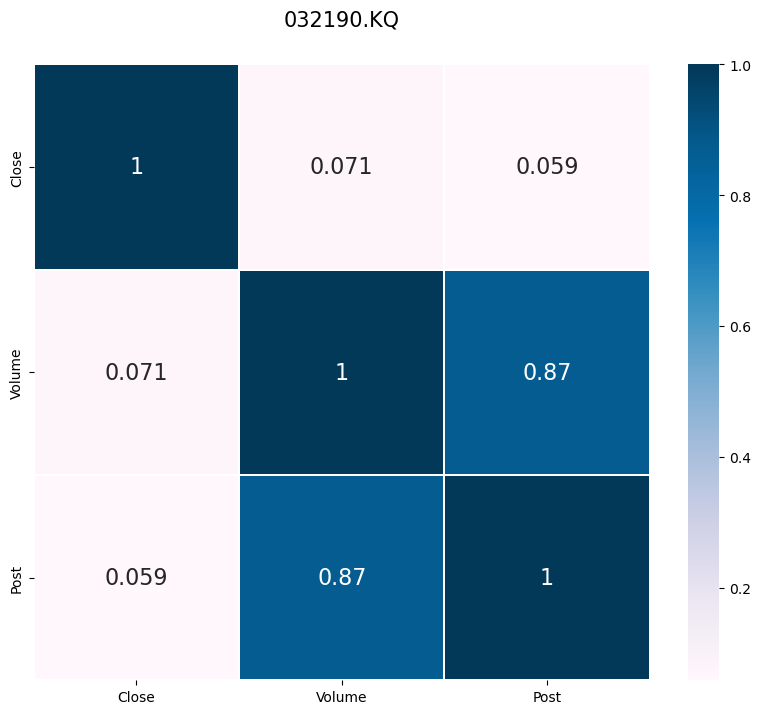

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("032190.KQ", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})